In [1]:
import os 
import glob
import ipympl
from astropy.table import Table
from astropy.io import ascii
from astropy.io import fits
from astropy.time import Time

import numpy as np

import datetime as dt

from astroquery.vizier import Vizier
from astroquery.esasky import ESASky

from matplotlib import pyplot as plt
import seaborn as sns; sns.set(context='talk')

from matplotlib.colors import LogNorm

from tqdm.notebook import trange, tqdm

from hyperscreen import hypercore

%config InlineBackend.figure_format = 'retina'
# %matplotlib widget

In [2]:
marchfile = 'march2020_arlac_evt2.fits'
with fits.open(marchfile) as hdulist:
    hdulist.info()
    header=hdulist[1].header
    data = hdulist[1].data
    gti = hdulist[2].data
    
gti




Filename: march2020_arlac_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    806   667149R x 26C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1I, 1I, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1I, 1I, 32X]   
  2  GTI           1 BinTableHDU     26   1R x 2C   [1D, 1D]   


FITS_rec([(7.01314133e+08, 7.01319218e+08)],
         dtype=(numpy.record, [('START', '>f8'), ('STOP', '>f8')]))

In [3]:
data['time']

array([7.01314133e+08, 7.01314133e+08, 7.01314133e+08, ...,
       7.01319218e+08, 7.01319218e+08, 7.01319218e+08])

In [4]:
evt2file = 'hrcm62650N000_evt2.fits'

with fits.open(evt2file) as hdulist:
    hdulist.info()
    header=hdulist[1].header
    data = hdulist[1].data

Filename: hrcm62650N000_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    786   490699R x 26C   [1D, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1J, 1J, 1I, 1I, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1I, 1I, 32X]   
  2  GTI           1 BinTableHDU     26   1R x 2C   [1D, 1D]   


In [5]:
data

FITS_rec([(7.17733397e+08, 14, 32, 1, 320,  375,  23,  97,  530,  118, 8327, 3606, 8329, 3601, 8328, 3601, 19876.98 , 14022.301 , 15427.819, 20626.98 , 11.4296875, 11,  36, 1463, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (7.17733473e+08, 24, 25, 1,  21,  497, 416,  48,  626,  276, 6589, 6380, 6593, 6387, 6592, 6387, 16682.541, 14763.491 , 17146.12 , 17814.66 , 14.71875  , 13,  36, 1884, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (7.17733503e+08, 16, 31, 1, 247,  520,  25, 179,  613,   64, 8030, 4152, 8025, 4149, 8024, 4149, 19274.879, 14194.537 , 15657.211, 19996.848, 12.875    , 11,  38, 1648, 0, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          ...,
          (7.17740452e+08, 12,  7, 1, 207, 3281, 754, 968, 2907,  296, 1879, 3233, 1876, 3235, 1875, 3235, 15576.414,  9204.3545, 21950.688, 2

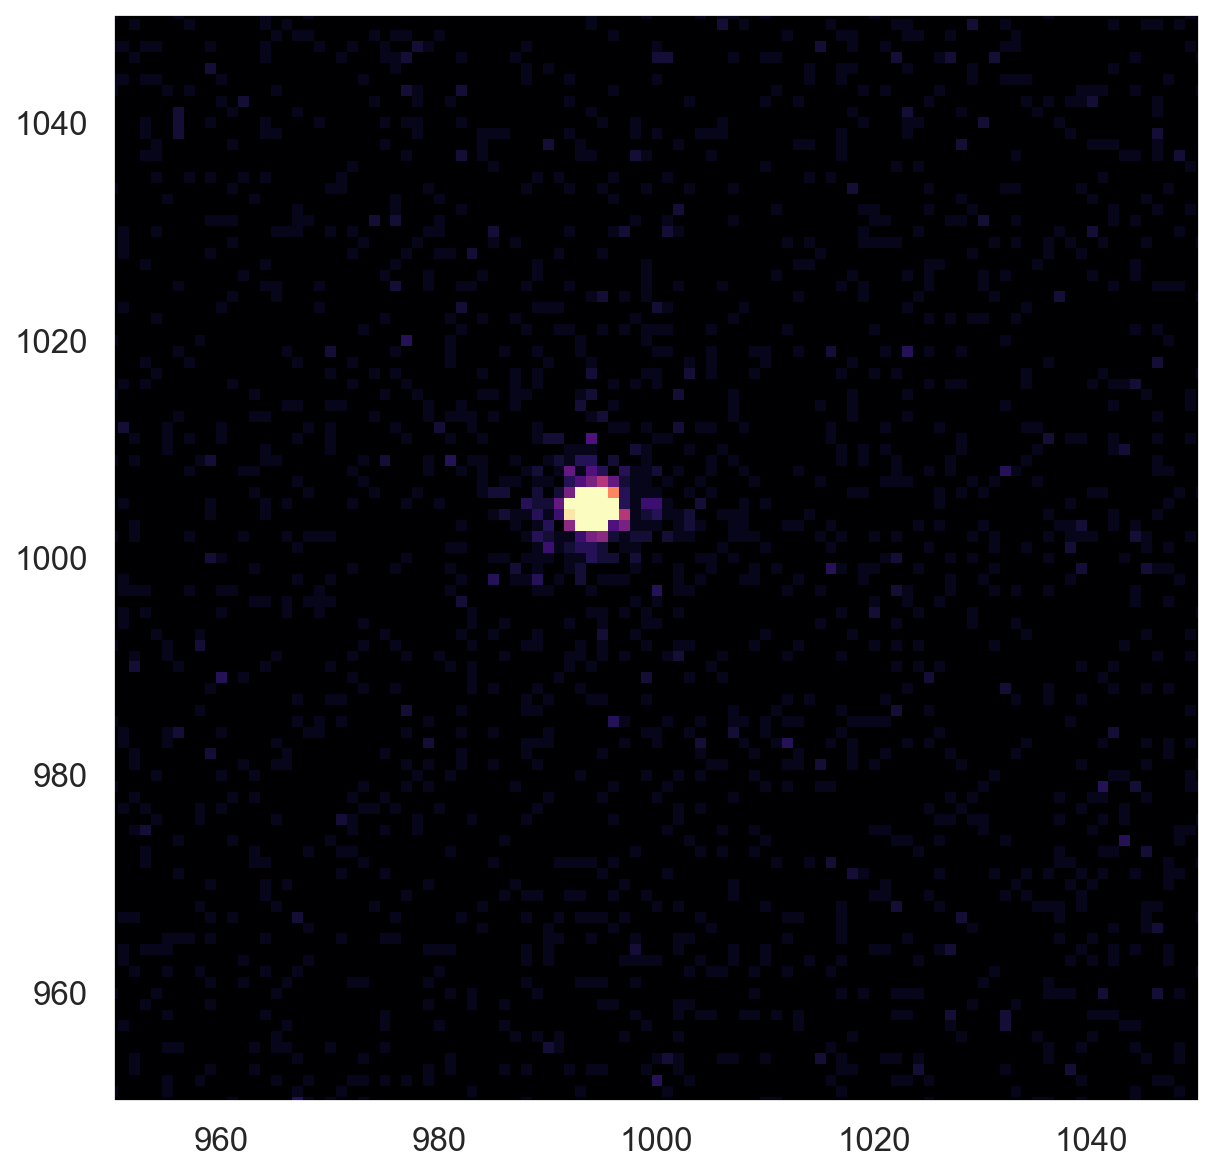

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

img_data, yedges, xedges = np.histogram2d(data['x'], data['y'], (2000,2000))
ax.imshow(img_data,cmap='magma', origin='lower', vmin=0, vmax=20)
ax.grid(False)

ax.set_xlim(950,1050)
ax.set_ylim(950,1050)
plt.show()

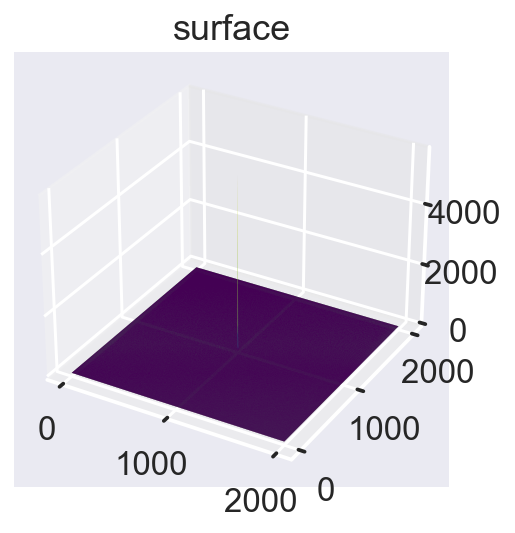

In [11]:
ax = plt.axes(projection='3d')
xx, yy = np.mgrid[0:img_data.shape[0], 0:img_data.shape[1]]
ax.plot_surface(xx, yy, img_data, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [5]:
evt1 = hypercore.HRCevt1('hrcm62650_000N000_evt1.fits')

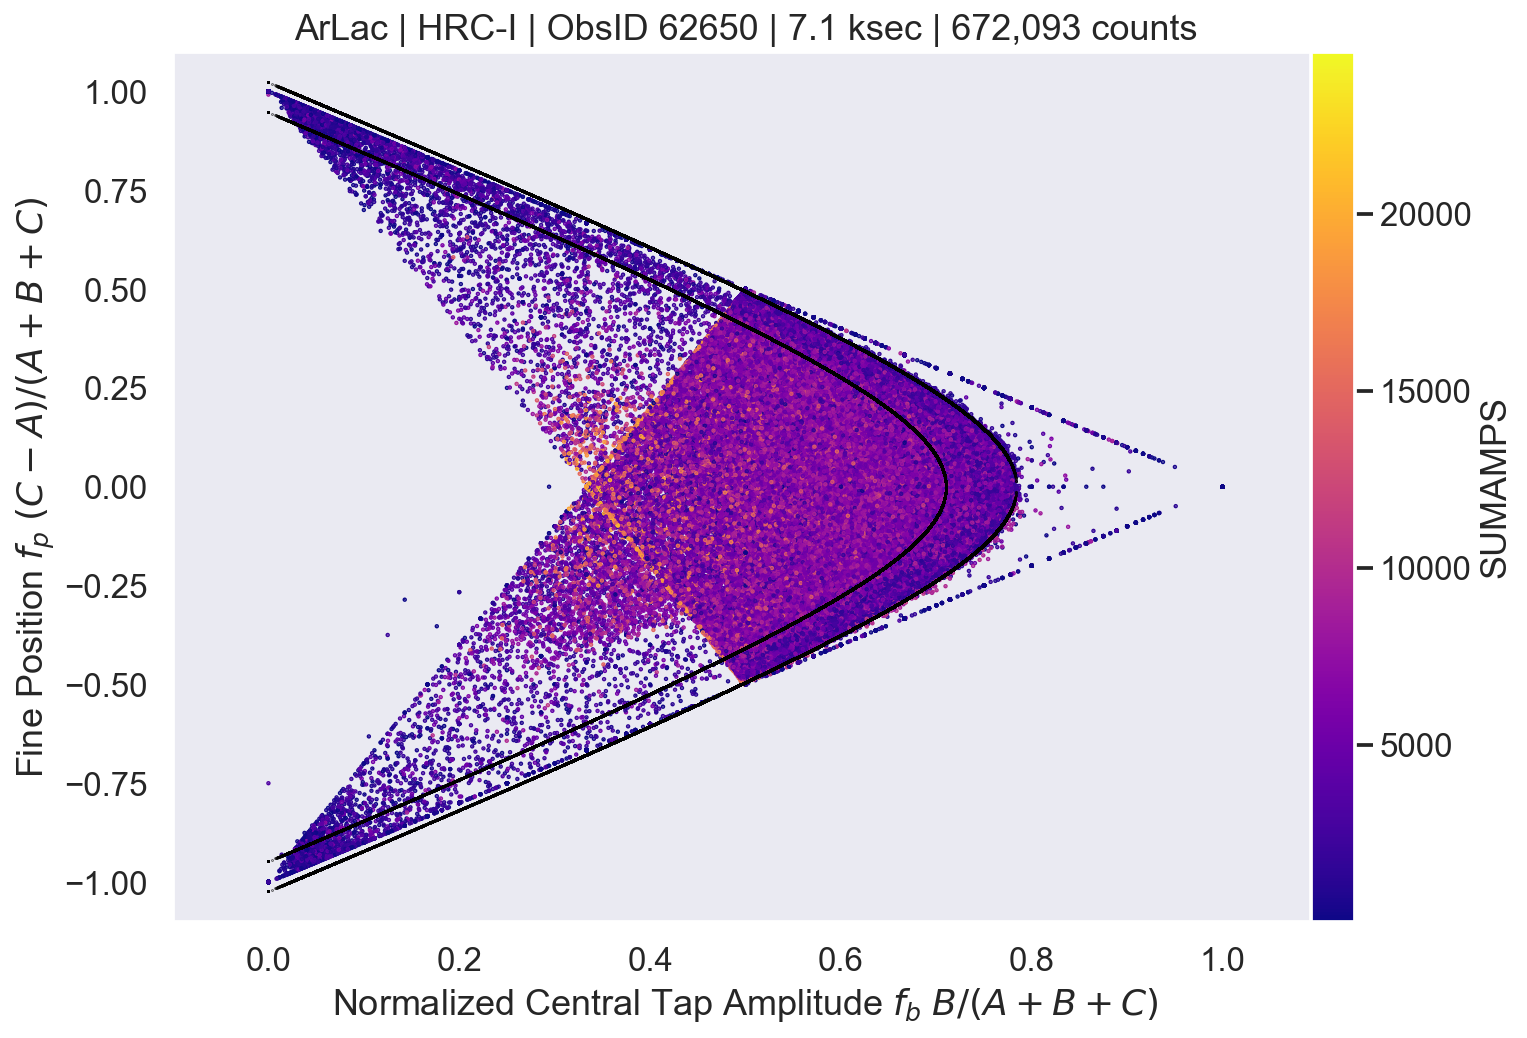

In [20]:
evt1.boomerang()

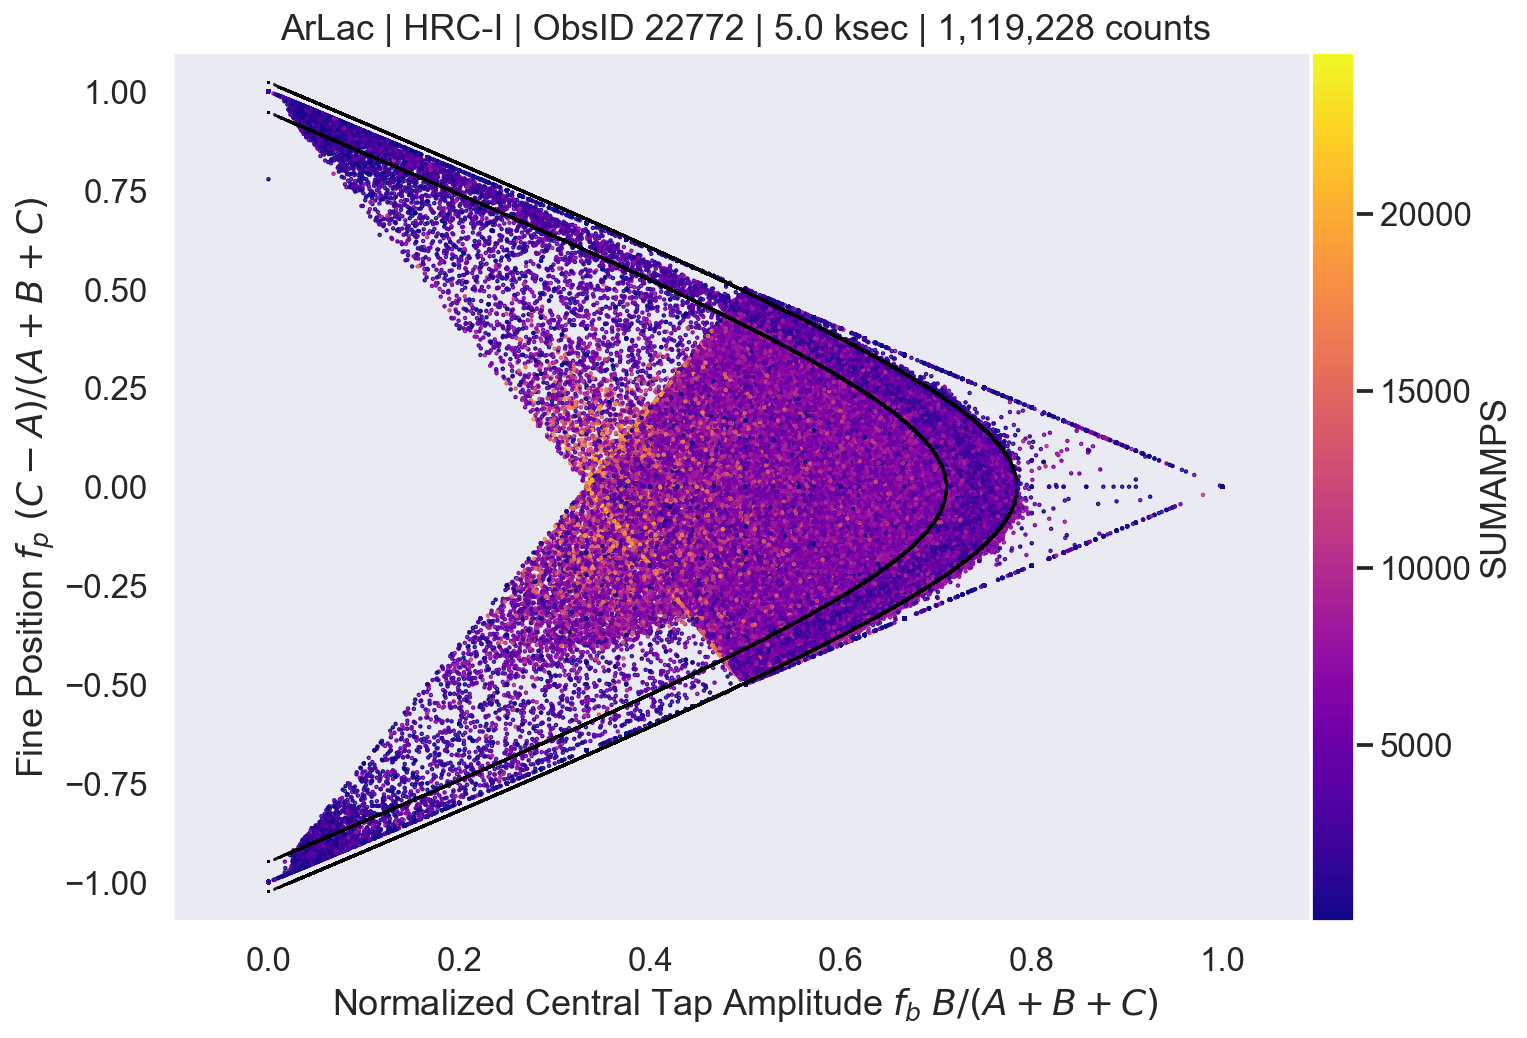

In [21]:
march = hypercore.HRCevt1('march2020_arlac_evt1.fits')
march.boomerang()